In [12]:
#imports we know we'll need
import skopt
# !pip install scikit-optimize if  necessary
from skopt import gbrt_minimize, gp_minimize
from skopt.utils import use_named_args
from skopt.space import Real, Categorical, Integer  

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow
from tensorflow.python.keras import backend as K
import gc


from keras.backend.tensorflow_backend import set_session
from keras.backend.tensorflow_backend import clear_session
from keras.backend.tensorflow_backend import get_session

In [13]:
dim_learning_rate = Real(low=1e-4, high=1e-2, prior='log-uniform',
                         name='learning_rate')
dim_num_dense_layers = Integer(low=1, high=3, name='num_dense_layers')

dim_num_dense_nodes1 = Integer(low=1, high=300, name='num_dense_nodes1')
dim_num_dense_nodes2 = Integer(low=1, high=300, name='num_dense_nodes2')
dim_num_dense_nodes3 = Integer(low=1, high=300, name='num_dense_nodes3')

dim_activation = Categorical(categories=['relu', 'tanh'],
                             name='activation')
dim_batch_size = Integer(low=1, high=128, name='batch_size')
dim_adam_decay = Real(low=1e-6,high=1e-2,name="adam_decay")

dimensions = [dim_learning_rate,
              dim_num_dense_layers,

              dim_num_dense_nodes1,
              dim_num_dense_nodes2,
              dim_num_dense_nodes3,
              
              dim_activation,
              dim_batch_size,
              dim_adam_decay
             ]
default_parameters = [1e-3, 1, 13,13,13 ,'relu',64, 1e-3]

In [14]:
from keras.optimizers import Adam
def create_model(learning_rate, num_dense_layers,
                 num_dense_nodes1, num_dense_nodes2,num_dense_nodes3, activation, adam_decay):
    #start the model making process and create our first layer
    model = Sequential()
    model.add(Dense(99, input_shape= input_shape, activation=activation
                   ))
    #create a loop making a new dense layer for the amount passed to this model.
    #naming the layers helps avoid tensorflow error deep in the stack trace.
    for i in range(num_dense_layers):
        name = 'layer_dense_{0}'.format(i+1)
        if i==0:
            model.add(Dense(num_dense_nodes1,
                     activation=activation,
                            name=name
                     ))
        if i==1:
            model.add(Dense(num_dense_nodes2,
                     activation=activation,
                            name=name
                     ))
        if i==2:
            model.add(Dense(num_dense_nodes3,
                     activation=activation,
                            name=name
                     ))
    #add our classification layer.
    model.add(Dense(33,activation='sigmoid'))
    
    #setup our optimizer and compile
    adam = Adam(lr=learning_rate, decay= adam_decay)
    model.compile(optimizer=adam, loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [15]:
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    print(gc.collect()) # if it's done something you should see a number being outputted

    # use the same config as you used to create the session
    config = tensorflow.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tensorflow.Session(config=config))

In [23]:
@use_named_args(dimensions=dimensions)
def fitness(learning_rate, num_dense_layers, 
            num_dense_nodes1,num_dense_nodes2,num_dense_nodes3,activation, batch_size,adam_decay):

    model = create_model(learning_rate=learning_rate,
                         num_dense_layers=num_dense_layers,
                         
                         num_dense_nodes1=num_dense_nodes1,
                         num_dense_nodes2=num_dense_nodes2,
                         num_dense_nodes3=num_dense_nodes3,
                         
                         activation=activation,
                         adam_decay=adam_decay
                        )
    

    #named blackbox becuase it represents the structure
    blackbox = model.fit(x=X_train,
                        y=y_train,
                        epochs=90,
                        batch_size=batch_size,
                        validation_split=0.15,
                        )
    #return the validation accuracy for the last epoch.
    accuracy = blackbox.history['val_acc'][-1]

    # Print the classification accuracy.
    print()
    print("Accuracy: {0:.2%}".format(accuracy))
    print()


    # Delete the Keras model with these hyper-parameters from memory.
    del model
    del blackbox
    # Clear the Keras session, otherwise it will keep adding new
    # models to the same TensorFlow graph each time we create
    # a model with a different set of hyper-parameters.
    K.clear_session()
    tensorflow.reset_default_graph()
    gc.collect()
    reset_keras()
    # the optimizer aims for the lowest score, so we return our negative accuracy
    return -accuracy

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
LUNES=pd.read_csv("AC_PRIN_LUNES.csv",index_col = 0)
MARTES=pd.read_csv("AC_PRIN_MARTES.csv",index_col = 0)
MIERCOLES=pd.read_csv("AC_PRIN_MIERCOLES.csv",index_col = 0)
JUEVES=pd.read_csv("AC_PRIN_JUEVES.csv",index_col = 0)
VIERNES=pd.read_csv("AC_PRIN_VIERNES.csv",index_col = 0)
SABADO=pd.read_csv("AC_PRIN_SABADO.csv",index_col = 0)
DOMINGO=pd.read_csv("AC_PRIN_DOMINGO.csv",index_col = 0)
###UNIVERSIDAD POLITECNICA DE VALENCIA
LUNESEV=pd.read_csv("5EV5_LUNES.csv",index_col = 0)
MARTESEV=pd.read_csv("5EV5_MARTES.csv",index_col = 0)
MIERCOLESEV=pd.read_csv("5EV5_MIERCOLES.csv",index_col = 0)
JUEVESEV=pd.read_csv("5EV5_JUEVES.csv",index_col = 0)
VIERNESEV=pd.read_csv("5EV5_VIERNES.csv",index_col = 0)
SABADOEV=pd.read_csv("5EV5_SABADO.csv",index_col = 0)
DOMINGOEV=pd.read_csv("5EV5_DOMINGO.csv",index_col = 0)
#### DATOS KANGLE
LUNESKG=pd.read_csv("KANGLE________LUNES.csv",index_col = 0)
MARTESKG=pd.read_csv("KANGLE________MARTES.csv",index_col = 0)
MIERCOLESKG=pd.read_csv("KANGLE________MIERCOLES.csv",index_col = 0)
JUEVESKG=pd.read_csv("KANGLE________JUEVES.csv",index_col = 0)
VIERNESKG=pd.read_csv("KANGLE________VIERNES.csv",index_col = 0)
SABADOKG=pd.read_csv("KANGLE________SABADO.csv",index_col = 0)
DOMINGOKG=pd.read_csv("KANGLE________DOMINGO.csv",index_col = 0)
##DATOS FRANCIA
LUNESFR=pd.read_csv("FRANCIA_______LUNES.csv",index_col = 0)
MARTESFR=pd.read_csv("FRANCIA_______MARTES.csv",index_col = 0)
MIERCOLESFR=pd.read_csv("FRANCIA_______MIERCOLES.csv",index_col = 0)
JUEVESFR=pd.read_csv("FRANCIA_______JUEVES.csv",index_col = 0)
VIERNESFR=pd.read_csv("FRANCIA_______VIERNES.csv",index_col = 0)
SABADOFR=pd.read_csv("FRANCIA_______SABADO.csv",index_col = 0)
DOMINGOFR=pd.read_csv("FRANCIA_______DOMINGO.csv",index_col = 0)
##DATOS RESIDENCIA 1
LUNESR1=pd.read_csv("RESIDENCIA1______LUNES.csv",index_col = 0)
MARTESR1=pd.read_csv("RESIDENCIA1______MARTES.csv",index_col = 0)
MIERCOLESR1=pd.read_csv("RESIDENCIA1______MIERCOLES.csv",index_col = 0)
JUEVESR1=pd.read_csv("RESIDENCIA1______JUEVES.csv",index_col = 0)
VIERNESR1=pd.read_csv("RESIDENCIA1______VIERNES.csv",index_col = 0)
SABADOR1=pd.read_csv("RESIDENCIA1______SABADO.csv",index_col = 0)
DOMINGOR1=pd.read_csv("RESIDENCIA1______DOMINGO.csv",index_col = 0)
##DATOS RESIDENCIA 10
LUNESR10=pd.read_csv("RESIDENCIA10______LUNES.csv",index_col = 0)
MARTESR10=pd.read_csv("RESIDENCIA10______MARTES.csv",index_col = 0)
MIERCOLESR10=pd.read_csv("RESIDENCIA10______MIERCOLES.csv",index_col = 0)
JUEVESR10=pd.read_csv("RESIDENCIA10______JUEVES.csv",index_col = 0)
VIERNESR10=pd.read_csv("RESIDENCIA10______VIERNES.csv",index_col = 0)
SABADOR10=pd.read_csv("RESIDENCIA10______SABADO.csv",index_col = 0)
DOMINGOR10=pd.read_csv("RESIDENCIA10______DOMINGO.csv",index_col = 0)
##DATOS RESIDENCIA 11
LUNESR11=pd.read_csv("RESIDENCIA11______LUNES.csv",index_col = 0)
MARTESR11=pd.read_csv("RESIDENCIA11______MARTES.csv",index_col = 0)
MIERCOLESR11=pd.read_csv("RESIDENCIA11______MIERCOLES.csv",index_col = 0)
JUEVESR11=pd.read_csv("RESIDENCIA11______JUEVES.csv",index_col = 0)
VIERNESR11=pd.read_csv("RESIDENCIA11______VIERNES.csv",index_col = 0)
SABADOR11=pd.read_csv("RESIDENCIA11______SABADO.csv",index_col = 0)
DOMINGOR11=pd.read_csv("RESIDENCIA11______DOMINGO.csv",index_col = 0)

total=pd.concat([LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO,DOMINGO,LUNESEV,MARTESEV,MIERCOLESEV,JUEVESEV,VIERNESEV,SABADOEV,DOMINGOEV,
                LUNESKG,MARTESKG,MIERCOLESKG,JUEVESKG,VIERNESKG,SABADOKG,DOMINGOKG,
                LUNESFR,MARTESFR,MIERCOLESFR,JUEVESFR,VIERNESFR,SABADOFR,DOMINGOFR,
                LUNESR1,MARTESR1,MIERCOLESR1,JUEVESR1,VIERNESR1,SABADOR1,DOMINGOR1,
                LUNESR10,MARTESR10,MIERCOLESR10,JUEVESR10,VIERNESR10,SABADOR10,DOMINGOR10,
                LUNESR11,MARTESR11,MIERCOLESR11,JUEVESR11,VIERNESR11,SABADOR11,DOMINGOR11])

In [25]:
total2=total.sample(frac=1, replace=True, random_state=1)
No_dias=total.shape[0]
dataset = np.zeros((No_dias,99))
dataset=total2.iloc[:,0:99]
salida=total2.iloc[:,99:133]

In [26]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
print(train_size,test_size,len(dataset))
Xtrain=np.array(dataset.iloc[0:train_size,:])
Xtest=np.array(dataset.iloc[train_size:,:])
Ytrain=np.array(salida.iloc[0:train_size,:])
Ytest=np.array(salida.iloc[train_size:,:])
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

3156 789 3945
(3156, 99) (789, 99) (3156, 33) (789, 33)


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
scaler = StandardScaler().fit(Xtrain)

Xtrain = scaler.transform(Xtrain)

Xtest = scaler.transform(Xtest)



In [198]:
joblib.dump(scaler, 'escalamieto_OP.pkl') 

['escalamieto_OP.pkl']

CODIGO DE OPTIMIZACION

In [28]:
X_train = Xtrain
y_train = Ytrain
input_shape= X_train[0].shape

In [129]:
"""
gp_result = gp_minimize(func=fitness,
                            dimensions=dimensions,
                            n_calls=12,
                            noise= 0.01,
                            n_jobs=-1,
                            kappa = 5,
                            x0=default_parameters)
"""
gbrt_result = gbrt_minimize(func=fitness,
                            dimensions=dimensions,
                            n_calls=50,
                            n_jobs=-1,
                            x0=default_parameters)

Train on 2682 samples, validate on 474 samples
Epoch 1/90
2682/2682 [==============================] - 1s 270us/step - loss: 0.6614 - acc: 0.6222 - val_loss: 0.5806 - val_acc: 0.7562
Epoch 2/90
2682/2682 [==============================] - 0s 76us/step - loss: 0.4584 - acc: 0.8343 - val_loss: 0.3462 - val_acc: 0.8870
Epoch 3/90
2682/2682 [==============================] - 0s 50us/step - loss: 0.2862 - acc: 0.9020 - val_loss: 0.2333 - val_acc: 0.9383
Epoch 4/90
2682/2682 [==============================] - 0s 49us/step - loss: 0.2117 - acc: 0.9474 - val_loss: 0.1909 - val_acc: 0.9498
Epoch 5/90
2682/2682 [==============================] - 0s 40us/step - loss: 0.1867 - acc: 0.9491 - val_loss: 0.1759 - val_acc: 0.9510
Epoch 6/90
2682/2682 [==============================] - 0s 41us/step - loss: 0.1737 - acc: 0.9499 - val_loss: 0.1670 - val_acc: 0.9513
Epoch 7/90
2682/2682 [==============================] - 0s 40us/step - loss: 0.1649 - acc: 0.9506 - val_loss: 0.1605 - val_acc: 0.9510
Epoch 8

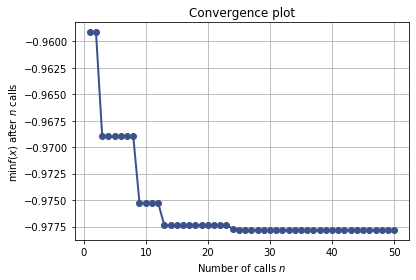

In [147]:
#gp_result.x
search_result=gbrt_result
plot_convergence(search_result)
search_result.x
#space.point_to_dict(search_result.x)
search_result.fun
aaaa=sorted(zip(search_result.func_vals, search_result.x_iters))

In [173]:
df = pd.DataFrame(search_result.x_iters,columns =['Learning Rate', 'Numero de capas ocultas', 'Neuronas en 1 capa oculta', 'Neuronas en 2 capa oculta', 'Neuronas en 3 capa oculta', 'funcion activacion', 'Tamano de batch ','ADAM decay']) 
df['acc']=search_result.func_vals

In [199]:
search_result.fun

-0.9778161079068727

In [175]:
df.to_csv('optimizacion.csv', index=False)

In [181]:
#del model
gbrt_result2 = [0.00812947, 2, 134, 299, 39, 'tanh', 94, 7.499189092642762e-05]
reset_keras()
model = create_model(gbrt_result[0],gbrt_result[1],gbrt_result[2],gbrt_result[3],gbrt_result[4],gbrt_result[5],gbrt_result[7])
history=model.fit(X_train,y_train, epochs=150,batch_size=gbrt_result[6], verbose=1,validation_split=0.15)#model.evaluate(Xtest,Ytest)

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x000001B8E50F4DD8>>
Traceback (most recent call last):
  File "D:\Programas\Anaconda3\envs\Tensor\lib\site-packages\tensorflow\python\client\session.py", line 1473, in __del__
    self._session._session, self._handle)
tensorflow.python.framework.errors_impl.CancelledError: (None, None, 'Session has been closed.')
Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x000001B8E56C1240>>
Traceback (most recent call last):
  File "D:\Programas\Anaconda3\envs\Tensor\lib\site-packages\tensorflow\python\client\session.py", line 1473, in __del__
    self._session._session, self._handle)
tensorflow.python.framework.errors_impl.CancelledError: (None, None, 'Session has been closed.')


84192
Train on 2682 samples, validate on 474 samples
Epoch 1/150
2682/2682 [==============================] - 1s 376us/step - loss: 0.2412 - acc: 0.9284 - val_loss: 0.1627 - val_acc: 0.9514
Epoch 2/150
2682/2682 [==============================] - 0s 77us/step - loss: 0.1456 - acc: 0.9520 - val_loss: 0.1351 - val_acc: 0.9538
Epoch 3/150
2682/2682 [==============================] - 0s 81us/step - loss: 0.1218 - acc: 0.9548 - val_loss: 0.1283 - val_acc: 0.9557
Epoch 4/150
2682/2682 [==============================] - 0s 123us/step - loss: 0.1108 - acc: 0.9585 - val_loss: 0.1198 - val_acc: 0.9561
Epoch 5/150
2682/2682 [==============================] - 0s 78us/step - loss: 0.0974 - acc: 0.9627 - val_loss: 0.1099 - val_acc: 0.9595
Epoch 6/150
2682/2682 [==============================] - 0s 78us/step - loss: 0.0898 - acc: 0.9656 - val_loss: 0.1135 - val_acc: 0.9600
Epoch 7/150
2682/2682 [==============================] - 0s 57us/step - loss: 0.0807 - acc: 0.9688 - val_loss: 0.1119 - val_acc: 

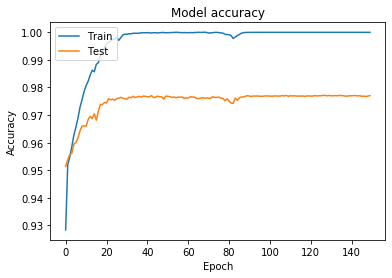

In [182]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

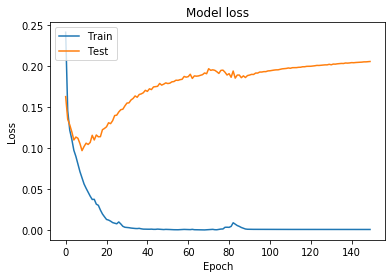

In [183]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [185]:
Ypred = model.predict(Xtest)

In [186]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 99)                9900      
_________________________________________________________________
layer_dense_1 (Dense)        (None, 277)               27700     
_________________________________________________________________
layer_dense_2 (Dense)        (None, 273)               75894     
_________________________________________________________________
dense_2 (Dense)              (None, 33)                9042      
Total params: 122,536
Trainable params: 122,536
Non-trainable params: 0
_________________________________________________________________


In [187]:
np.round(Ypred[2])

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [188]:
aux=0
for i in range (Ypred.shape[0]):
    if (np.round(Ypred[i])==Ytest[i]).all():
        aux=aux+1
    else:
        a=(np.round(Ypred[i])==Ytest[i])
        unique, counts = np.unique(a, return_counts=True)
        if counts[0] <4:
            aux=aux+1

In [189]:
eficiencia=aux/Ypred.shape[0]
print(aux,Ypred.shape[0],eficiencia)

753 789 0.9543726235741445


In [190]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Ytest, Ypred))

0.02379526399155535


In [191]:
Ypred.shape

(789, 33)

In [192]:
from sklearn.metrics import confusion_matrix
tn = np.zeros(33)
fp = np.zeros(33)
fn = np.zeros(33)
tp = np.zeros(33)

Accuracy = np.zeros(33)
Precision = np.zeros(33)
Recall = np.zeros(33)
f1 = np.zeros(33)
for i in range(33):
    try:
        tn[i], fp[i], fn[i], tp[i]=confusion_matrix(Ypred[:,i].astype(int),Ytest[:,i].astype(int)).ravel()
        Accuracy[i] = (tn[i]+tp[i])*100/(tp[i]+tn[i]+fp[i]+fn[i])
        Precision[i] = tp[i]/(tp[i]+fp[i])
        Recall[i] = tp[i]/(tp[i]+fn[i])
        f1[i] = (2*Precision[i]*Recall[i])/(Precision[i] + Recall[i])
        print("Accuracy : ",Accuracy[i])
    except:
        print(i)

Accuracy :  86.05830164765526
Accuracy :  98.2256020278834
2
3
Accuracy :  91.25475285171103
5
6
Accuracy :  79.72116603295311
8
Accuracy :  93.78960709759188
Accuracy :  89.60709759188846
Accuracy :  93.02915082382764
Accuracy :  91.50823827629911
Accuracy :  95.18377693282636
Accuracy :  85.93155893536121
Accuracy :  95.69074778200253
Accuracy :  99.36628643852978
Accuracy :  94.55006337135615
Accuracy :  99.23954372623574
Accuracy :  99.36628643852978
Accuracy :  99.11280101394169
Accuracy :  96.1977186311787
Accuracy :  99.23954372623574
Accuracy :  94.93029150823827
Accuracy :  99.23954372623574
Accuracy :  98.35234474017744
Accuracy :  98.98605830164766
Accuracy :  93.5361216730038
Accuracy :  98.73257287705957
Accuracy :  90.8745247148289
Accuracy :  98.47908745247149
Accuracy :  98.47908745247149
Accuracy :  98.73257287705957


D:\Programas\Anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


In [200]:
Precision

array([0.25342466, 0.06666667, 0.        , 0.        , 0.21176471,
       0.        , 0.        , 0.23188406, 0.        , 0.05882353,
       0.16666667, 0.01785714, 0.04285714, 0.07317073, 0.04310345,
       0.15      , 0.16666667, 0.06818182, 0.        , 0.28571429,
       0.22222222, 0.11764706, 0.        , 0.14893617, 0.        ,
       0.        , 0.        , 0.30769231, 0.        , 0.2183908 ,
       0.        , 0.2       , 0.        ])

In [193]:
Accuracy2 = (tn.sum()+tp.sum())*100/(tp.sum()+tn.sum()+fp.sum()+fn.sum())
Precision2 = tp.sum()/(tp.sum()+fp.sum())
Recall2 = tp.sum()/(tp.sum()+fn.sum())
Espesi= tn.sum()/(tn.sum()+fp.sum())
sensi = tp.sum()/(tp.sum()+fn.sum())
f1_2 = ((1+(8*8))*Precision2*Recall2)/((8*8)*Precision2 + Recall2)

In [194]:
[Accuracy2,Precision2*100,Recall2*100,Espesi*100,sensi*100,f1_2*100]

[94.9076588810429,
 15.43778801843318,
 89.33333333333333,
 94.96501577719852,
 89.33333333333333,
 83.20596102407336]

In [196]:
print(Ypred[:,0].astype(int))
print(Ytest[:,0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [197]:
model.save("MLANOMALIAS_OP.h5")

In [ ]:
#gbrt_result = [0.004822841807009301, 3, 379, 257, 'sigmoid', 76, 0.009899190596633045]

In [ ]:
#gbrt_result =[0.0021363296723156777, 1, 243, 96, 'sigmoid', 35, 0.003991454981799475]